# <span style="color:royalblue"> [6주차] 2024 데이터 분석 모델링</span> <img src="./data/logo.png" style="width: 120px;" align="right">
# 2024 머신러닝(ML), 딥러닝(DL) 문제해결 프로세스

--- 

<div style="text-align: right"> Final Edition : 2023.1.28<br>
    copyrightⓒ 2022 All rights reserved by Data Lover Pablo </div>

## [프로세스] 머신러닝(ML), 딥러닝(DL) 문제해결 프로세스

    1. 데이터 로드
    2. 결측치 확인 및 제거
    3. 이상치 확인 및 제거
    4. 변수선택
    5. 데이터 정규화
    6. 모델 생성 및 학습
     6-1 머신러닝 Regression : LASSO, Ridge 모델 
     6-2 머신러닝 RandomForestRegressor
     6-3 딥러닝 Keras LSTM
    7. Grid Search
    8. Cross Validation

## [모델선택] 데이터에서 시작(X Variable, Target Y) [Ml map 사이킷런](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)

① 우리가 원하는 정답(Targe Y)은 무엇인가? ② 그 값에 영향을 미치는 요인(X 변수)는 무엇인가?   
③ 모델을 만들기 위한 X와 Y 데이터 셋을 가지고 있는가? ④ 데이터 셋이 충분한가? ⑤ 데이터의 형태는 어떠한가? 정형(이산, 범주)/비정형

![머신러닝map](./data/ml_map.png)

[Pycaret] https://pycaret.readthedocs.io/en/latest/

# 1. 데이터 로드

In [1]:
# 모듈 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns
import pickle

In [2]:
# 모듈환경 버전확인
print(pd.__version__)
print(np.__version__)
print(matplotlib.__version__)
print(sns.__version__)

2.0.3
1.24.4
3.7.0
0.12.2


In [3]:
# [5주차] Pickle 사용법 참고

In [4]:
with open( "./data/월별부동산데이터_2023", "rb" ) as file:
    df = pickle.load(file)

Can't get attribute 'new_block' on <module 'pandas.core.internals.blocks' from 'C:\\User\\Anaconda3\\lib\\site-packages\\pandas\\core\\internals\\blocks.py 이런 에러가 뜬다면 pickle 파일은 만든 pandas version과 불러오는 pandas 버전이 다른겁니다.

In [5]:
df

,강남구_매매지수,강남구_전세지수,서울_인허가물량,서울_분양물량,DFF,NASDAQCOM,CSUSHPISA,CORESTICKM159SFRBATL,HSN1F,USSTHPI,GDP,WM2NS,ICSA,gangnam_price(만원)
2013-01-01,55.539231,61.167145,3789.0,202.0,0.09,3019.51,146.825,2.068297,446.0,316.69,16648.189,10615.7,362000.0,59892
2013-02-01,55.444490,61.844689,3090.0,63.0,0.14,3179.10,147.783,2.146017,447.0,316.69,16648.189,10398.2,366000.0,59568
2013-03-01,55.509901,62.332408,4127.0,252.0,0.14,3169.74,149.962,2.099902,444.0,316.69,16648.189,10448.6,342000.0,59440
2013-04-01,55.479130,62.341758,5314.0,560.0,0.16,3239.17,151.517,1.935432,441.0,321.52,16728.687,10720.4,375000.0,57388
2013-05-01,55.585253,62.361958,6206.0,432.0,0.14,3299.13,152.848,1.907797,428.0,321.52,16728.687,10531.7,331000.0,57403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-01,95.993766,81.438153,834.0,2111.0,5.33,14283.91,309.226,5.217343,654.0,657.32,27610.128,20717.1,227000.0,142613
2023-09-01,96.624532,81.770394,408.0,373.0,5.33,14031.81,311.255,5.008782,698.0,657.32,27610.128,20662.8,229000.0,143692
2023-10-01,97.045327,82.233577,2071.0,2105.0,5.33,13219.32,313.276,4.931956,676.0,657.32,27938.831,20609.8,209000.0,144485
2023-11-01,97.245942,82.808694,937.0,531.0,5.33,13061.47,313.276,4.730629,615.0,657.32,27938.831,20600.9,220000.0,144875


#### 1) 데이터 셋 split (train, test)

In [6]:
train = df[df.index < pd.to_datetime('2019-12-31')]
test = df[df.index > pd.to_datetime('2019-12-31')]

In [7]:
print(train.shape)
print(test.shape)

(84, 14)
(48, 14)


총 138의 data raw가 존재하고, 학습용 데이터는 120 행(12개월 x 10년), 테스트 데이터는 25행(2년 1개월)으로 나눠져 있습니다.<br>
변수는 독립변수가 10개, 종속변수(target y)값이 1개로서 총 11개 입니다.

In [8]:
# 학습 데이터에 대한 전반적인 데이터 정보를 살펴봅니다.
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 84 entries, 2013-01-01 to 2019-12-01
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   강남구_매매지수              84 non-null     float64
 1   강남구_전세지수              84 non-null     float64
 2   서울_인허가물량              84 non-null     float64
 3   서울_분양물량               84 non-null     float64
 4   DFF                   84 non-null     float64
 5   NASDAQCOM             84 non-null     float64
 6   CSUSHPISA             84 non-null     float64
 7   CORESTICKM159SFRBATL  84 non-null     float64
 8   HSN1F                 84 non-null     float64
 9   USSTHPI               84 non-null     float64
 10  GDP                   84 non-null     float64
 11  WM2NS                 84 non-null     float64
 12  ICSA                  84 non-null     float64
 13  gangnam_price(만원)     84 non-null     int32  
dtypes: float64(13), int32(1)
memory usage: 9.5 KB


# 2. 결측치 확인 및 제거

#### 1) 결측치를 확인합니다

In [9]:
train.isnull().sum()

강남구_매매지수                0
강남구_전세지수                0
서울_인허가물량                0
서울_분양물량                 0
DFF                     0
NASDAQCOM               0
CSUSHPISA               0
CORESTICKM159SFRBATL    0
HSN1F                   0
USSTHPI                 0
GDP                     0
WM2NS                   0
ICSA                    0
gangnam_price(만원)       0
dtype: int64

실무 데이터에서는 결측치가 반드시 존재하는데 본 데이터는 이미 제거가 되었습니다.<br>
결측치 확인은 train.isnull().sum() 를 통해 확인 할 수도 있고, 아래 코드로 시각화해서 확인할 수도 있습니다.

In [10]:
# !pip install missingno

<Axes: >

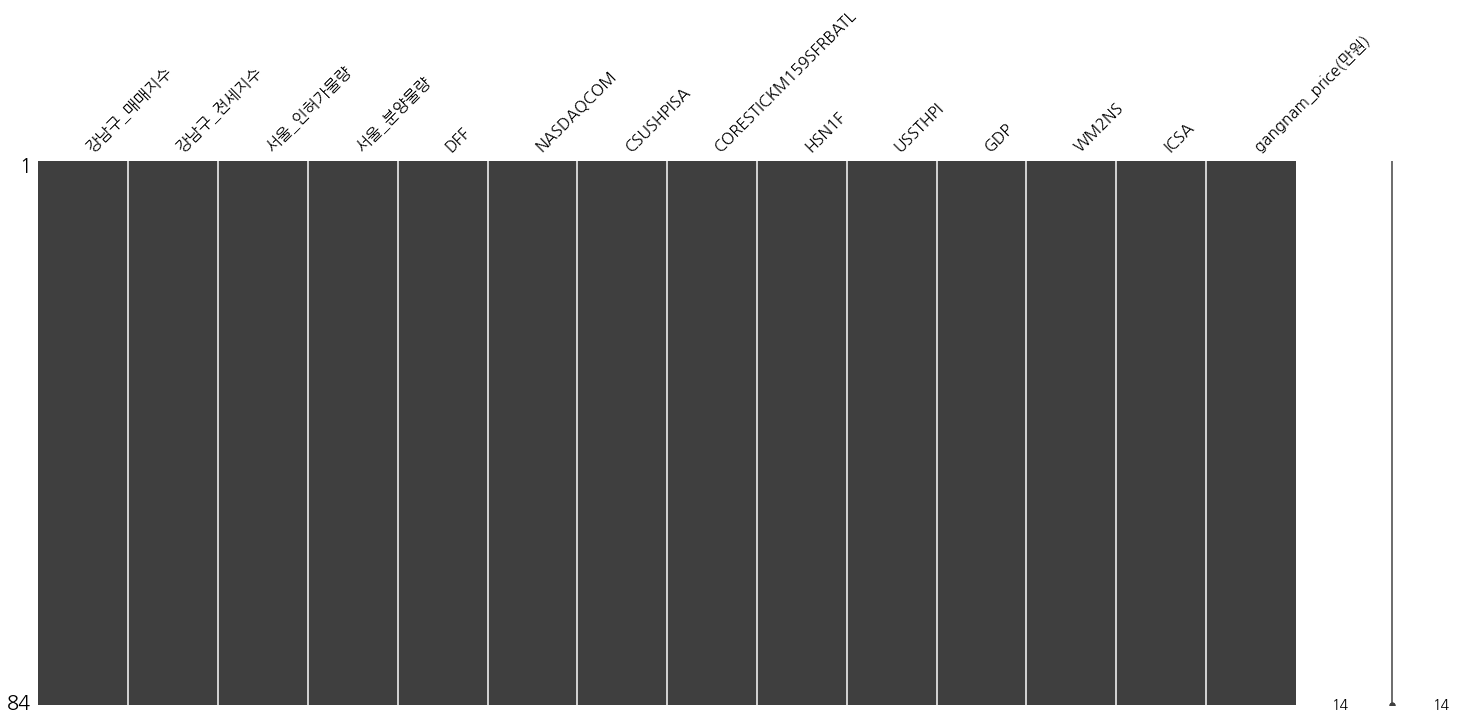

In [11]:
import matplotlib.pyplot as plt
import missingno as msno

%matplotlib inline

plt.rc('font', family = 'NanumGothic')
msno.matrix(train)

# 3. 이상치 확인 및 제거

#### 1) 이상치를 확인해기 위해서는 변수별 EDA를 수행해야 합니다.

**KDE : Kernel Density Estimation 커널 밀도 추정**<br>
- 밀도 추정은 x의 확률밀도함수(pdf, probability density function)를 추정
- 밀도추정(density estimation) 방법은 크게 ①parametric 방법과 ②non-parametric 방법으로 구분

$$P(a\leq x\leq b)=\int^{b}_{a}f(x) dx$$

![커널밀도추청](./data/kernel_1.png)

* $f(a)$는 $x=a$에서의 확률밀도(probability density), 즉 변수 x가 a라는 값을 가질 때의 상대적인 가능성(relative likelihood)를 나타냄
* 밀도(density)와 확률(probability)를 구분해 보면 위 그림에서 $x=a$일 확률은 0 이지만, (점) $x=a$에서의 밀도(density)는 $f(a)$로 0이 아님
* x가 a, b 사이의 값을 가질 확률(probability)은 그 구간에서의 확률밀도함수의 적분값(면적)으로 계산됨
* 즉, 밀도(density)는 확률밀도함수의 함수값이며, 밀도를 일정 구간에 대해 적분하면 확률이 나옴

**① Parametric 밀도추정**  
   * Parametric (모수 통계) 는 고정된 모수 집합이 있는 확률 분포로 적절하게 모델링할 수 있는 모집단에서 표본 데이터를 가져온다고 가정
   * Parametric 밀도추정은 미리 pdf(probability density function)에 대한 분포모델을 정해놓고 데이터들로부터 모델의 파라미터만 추정
   * 실무에서는 분포를 미리 알 수가 없으므로, 순수하게 관측된 데이터만 가지고 확률 밀도 함수를 추정해야 함 -> Non-parametric

**② non-parametric 밀도추정**
   * Non-parametric 밀도추정의 가장 간단한 형태가 바로 히스토그램(histogram)  
   * 히스토그램은 bin이 나눠져 있는 형태로 연속적이지 않음  
   
> 커널함수* 를 이용해 히스토그램의 문제를 개선한 방법이 커널밀도추정(KDE)  
  (*커널함수 : 원점을 중심으로 대칭. 적분값이 1인 non-negative(항상 0>0) 함수. 가우시언(Gaussian), 정규(Uniform) 분포형태를 띔.)

![커널밀도추청](./data/kernel_2.png)

In [12]:
# !pip install --user matplotlib==3.7.0
# !pip install --user pandas==2.0.0
# !pip install --user seaborn==0.12.2
# !pip install --user numpy==1.24.2

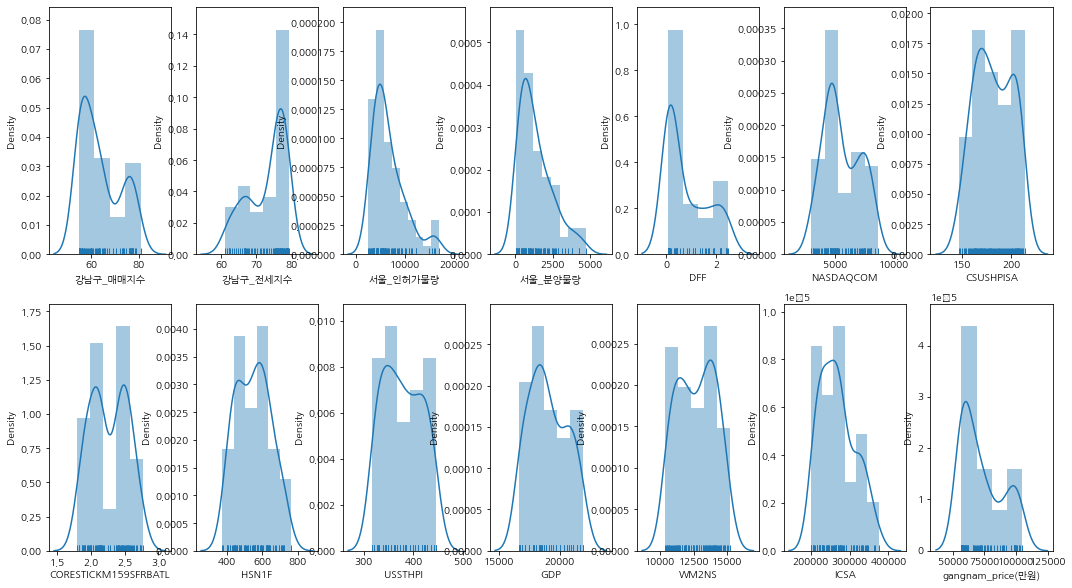

In [13]:
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

# 컬럼별 Data 분포 히스토그램
fig, ax = plt.subplots(nrows = 2, ncols = 7, figsize = (18, 10))

num = 0
ax = ax.flatten()

for col in list(train.columns[0:]):
    sns.distplot(train[col],ax=ax[num], kde = True, rug = True) # kde True는 확률 밀도 곡선이 나오고, rug는 하부에 밀도 분포표시
    num += 1    
    
plt.show()

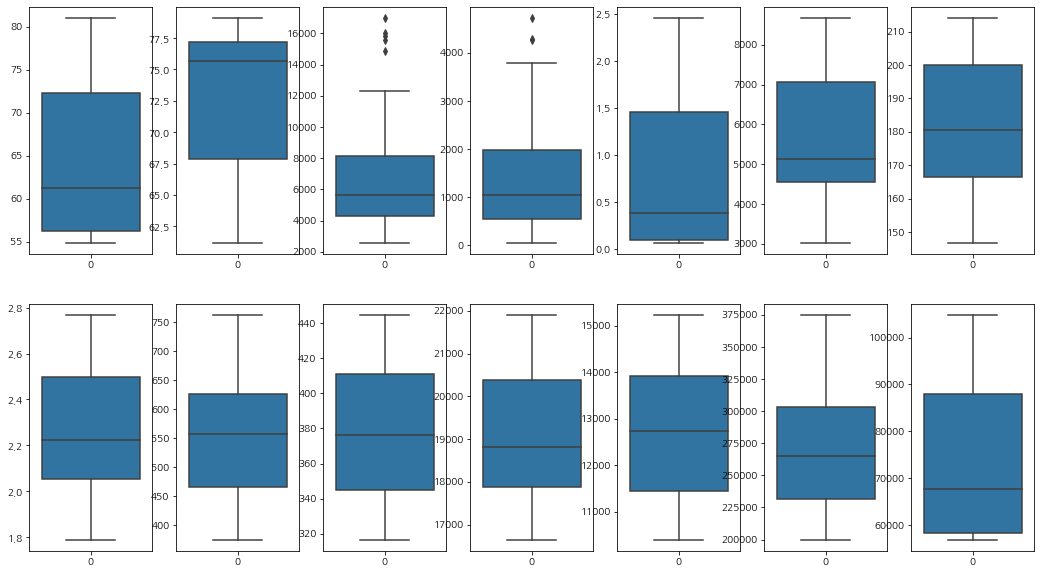

In [14]:
#컬럼별 Data 분포 Boxplot
fig, ax = plt.subplots(nrows = 2, ncols = 7, figsize = (18, 10))

num = 0
ax = ax.flatten()

for col in list(train.columns[0:]):
    sns.boxplot(train[col], ax = ax[num])
    num += 1    
    
plt.show()

변수별 boxplot을 살펴보면 서울 인허가 물량에  이상치가 존재하는 것을 알수 있습니다.<br>
이상치는 제거 하거나 대체할 때는 Domain Knowledge가 필요합니다.<br>
>인허가 물량이 특별히 많았던 해이므로 제거하지는 않겠습니다.

#### 2) 이상치 제거(방법, 우리는 미적용)

교과서적인 방법으로는 1분위 값과 3분위 값의 차이를 IQR로 설정하고,  
1분위값과 3분위값에서 IQR값의 1.5배수 만큼 큰 값과 작은 값은 이상치로 판단 합니다.  
위의 BOX PLOT에서 점으로 표현된 값을 제거한다고 보면 됩니다.

다시 한번, 이것은 교과서적인 방법이며 실무에서는 그렇게 제거해서는 안됩니다.
도메인 지식에 기반하여 이상치를 검토하고 제거 또는 대체해야 합니다.

<center><img src="./data/IQR.png" width = 550></center>

In [15]:
# 통계적 이상치를 제거하는 방법에 대해서 아래 코드를 참고해주세요

In [16]:
'''
quartile_1 = train.quantile(0.25)
quartile_3 = train.quantile(0.75)

IQR = quartile_3 - quartile_1
condition = (train < (quartile_1 - 1.5 * IQR)) | (train > (quartile_3 + 1.5 * IQR))
condition = condition.any(axis=1)
train = train[condition]
print('훈련데이터 Shape', train.shape)

print('교과서 방법으로 이상치가 제거된 모습')
fig, ax = plt.subplots(nrows = 2, ncols = 6, figsize = (18, 10))

num = 0
ax = ax.flatten()

for col in list(train.columns[0:]):
    sns.boxplot(train[col], ax = ax[num])
    num += 1    
    
plt.show()
'''

"\nquartile_1 = train.quantile(0.25)\nquartile_3 = train.quantile(0.75)\n\nIQR = quartile_3 - quartile_1\ncondition = (train < (quartile_1 - 1.5 * IQR)) | (train > (quartile_3 + 1.5 * IQR))\ncondition = condition.any(axis=1)\ntrain = train[condition]\nprint('훈련데이터 Shape', train.shape)\n\nprint('교과서 방법으로 이상치가 제거된 모습')\nfig, ax = plt.subplots(nrows = 2, ncols = 6, figsize = (18, 10))\n\nnum = 0\nax = ax.flatten()\n\nfor col in list(train.columns[0:]):\n    sns.boxplot(train[col], ax = ax[num])\n    num += 1    \n    \nplt.show()\n"

# 4. 변수선택
변수선택을 위해 각 변수의 영향도를 검토해야 합니다.

#### 1) 우선 상관관계를 그려보겠습니다.

In [17]:
# train[features].corr()

In [18]:
x = np.arange(9)
x_shape = x.reshape((3, 3))
np.zeros_like(x_shape)

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

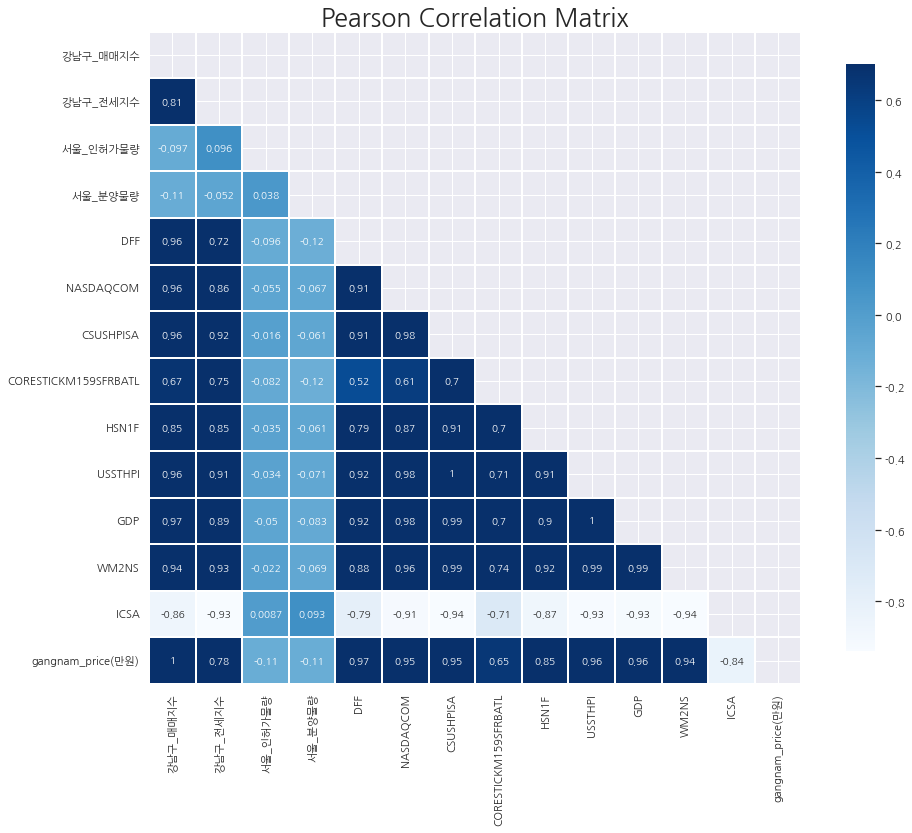

In [19]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False

import seaborn as sns
sns.set(font="NanumGothic")

import warnings
warnings.filterwarnings(action='ignore')

features = ['강남구_매매지수', '강남구_전세지수', '서울_인허가물량', '서울_분양물량', 'DFF', 'NASDAQCOM',
       'CSUSHPISA', 'CORESTICKM159SFRBATL', 'HSN1F', 'USSTHPI', 'GDP', 'WM2NS',
       'ICSA','gangnam_price(만원)']


# 삼각형 마스크를 만듭니다
mask = np.zeros_like(train[features].corr(), dtype=bool) # 우선 상관관계표와 형태가 같고 0이 들어있는 매트릭스를 만들어 줍니다. 12 x 12 Matrix
mask[np.triu_indices_from(mask)] = True # np.triu_indices_from : mask에서 인덱스를 반환 (위쪽 삼각형에 True, 아래 삼각형에 False)

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(train[features].corr(),
            linewidths=0.25,# 경계면 선구분 cf. 실선(0.5)으로 구분하기
            vmax=0.7, # 컬러바 범위 : 최소값 미지정 최대값 0.7 
            square=True,
            cmap="Blues", #히트맵 색깔. blue, green #"BuGn_r" to reverse # Blues # BuGn
            linecolor='w',# 라인 색은 흰색(white)
            
            annot=True,            # 실제 값을 표시한다
            annot_kws={"size":10},  # 실제 값 폰트 사이즈
            mask=mask,             # 위에서 설정한 마스크 부분(가릴부분) 지정한다
            cbar_kws={"shrink": .9}); # 오른쪽 컬러바 크기 줄이기 90% 크기

* 맨 아래 강남구_매매가를 보면, **INTDSRUSM193N(미국 기준금리)** 처럼 색이 짙은 변수일수록 상관계수가 높습니다.<br>
* 반면에 인허가물량럼 상관관계가 0.1 이하인 변수들도 있습니다.(우리는 인허가 물량이 2~3년 뒤 공급임을 이미 배웠습니다.) <BR>

* 상관관계는 양의 상관관계와 음의 상관관계가 있고, 약한 상관관계와 강한 상관관계가 있습니다.
* 음의 상관관계도 고려해야하므로, 통상 상관계수에 절대값을 취해서 0.1(자체 판단)이하 변수를 제거합니다.
    1. 서울 인허가 물량의 상관계수가 0.068으로 매우 낮지만, 2~3년 shift를 해서 정리하는 것이 맞습니다.
    2. Domain Knowledge가 중요한데, 인허가 물량은 공급의 직접적인 요소이므로 본 과제에서는 변수제거 파트에서 SKIP 하겠습니다.

In [20]:
# 강남구 매매가와 각 변수들 간의 상관관계를 그려보겠습니다.
co = train.corrwith(train['gangnam_price(만원)'])

# 상관계수를 내림차순으로 정리해서 출력해보죠
print(co.sort_values(ascending=False))

# 절대값으로 취합니다.
co_abs = abs(co)

gangnam_price(만원)       1.000000
강남구_매매지수                0.996420
DFF                     0.971319
GDP                     0.963569
USSTHPI                 0.957992
NASDAQCOM               0.949008
CSUSHPISA               0.948256
WM2NS                   0.937999
HSN1F                   0.850932
강남구_전세지수                0.780025
CORESTICKM159SFRBATL    0.654004
서울_분양물량                -0.107891
서울_인허가물량               -0.109934
ICSA                   -0.836020
dtype: float64


In [21]:
# 상관계수의 절대값을 내림차순으로 정리합니다.
co_sort = co_abs.sort_values(ascending=False)
co_sort = co_sort[co_sort>0.1] 
co_sort.to_frame().index

# 상관관계가 낮은 변수를 제거하고 새로운 변수를 구성합니다.
new_features = co_sort.to_frame().index
new_features

Index(['gangnam_price(만원)', '강남구_매매지수', 'DFF', 'GDP', 'USSTHPI', 'NASDAQCOM',
       'CSUSHPISA', 'WM2NS', 'HSN1F', 'ICSA', '강남구_전세지수',
       'CORESTICKM159SFRBATL', '서울_인허가물량', '서울_분양물량'],
      dtype='object')

In [22]:
print(len(features))
print(len(new_features))

print('제거된 변수의 갯수 :{}개'.format(len(features) - len(new_features)))

14
14
제거된 변수의 갯수 :0개


상관계수가 0.1보다 낮은 변수인 서울_인허가 물량 이 제거 되었습니다. <br>
* 이 부분은 사용하지 않고 기존 features로 계속 진행하겠습니다.

### Data Set 정리
지금까지 정리한 이상치와 변수선택을 고려하여 dataset을 정리합니다.

In [23]:
# # 데이터 불러오기
features = ['강남구_매매지수', '강남구_전세지수', '서울_인허가물량', '서울_분양물량', 'DFF', 'NASDAQCOM',
       'CSUSHPISA', 'CORESTICKM159SFRBATL', 'HSN1F', 'USSTHPI', 'GDP', 'WM2NS',
       'ICSA']

target = 'gangnam_price(만원)'

X = train[features]
y = train[target]

In [24]:
X

,강남구_매매지수,강남구_전세지수,서울_인허가물량,서울_분양물량,DFF,NASDAQCOM,CSUSHPISA,CORESTICKM159SFRBATL,HSN1F,USSTHPI,GDP,WM2NS,ICSA
2013-01-01,55.539231,61.167145,3789.0,202.0,0.09,3019.51,146.825,2.068297,446.0,316.69,16648.189,10615.7,362000.0
2013-02-01,55.444490,61.844689,3090.0,63.0,0.14,3179.10,147.783,2.146017,447.0,316.69,16648.189,10398.2,366000.0
2013-03-01,55.509901,62.332408,4127.0,252.0,0.14,3169.74,149.962,2.099902,444.0,316.69,16648.189,10448.6,342000.0
2013-04-01,55.479130,62.341758,5314.0,560.0,0.16,3239.17,151.517,1.935432,441.0,321.52,16728.687,10720.4,375000.0
2013-05-01,55.585253,62.361958,6206.0,432.0,0.14,3299.13,152.848,1.907797,428.0,321.52,16728.687,10531.7,331000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-01,76.855798,76.687059,4331.0,2002.0,2.14,8111.12,210.083,2.629246,720.0,440.74,21694.282,14789.1,200000.0
2019-09-01,77.400317,76.826387,2661.0,660.0,2.13,7962.88,210.892,2.606767,715.0,440.74,21694.282,14831.4,207000.0
2019-10-01,78.331685,77.484499,2987.0,612.0,1.88,7908.68,211.779,2.733341,721.0,444.66,21902.390,15012.9,209000.0
2019-11-01,79.045414,77.769412,4275.0,915.0,1.57,8386.40,212.770,2.768217,710.0,444.66,21902.390,15077.4,217000.0


In [25]:
df

,강남구_매매지수,강남구_전세지수,서울_인허가물량,서울_분양물량,DFF,NASDAQCOM,CSUSHPISA,CORESTICKM159SFRBATL,HSN1F,USSTHPI,GDP,WM2NS,ICSA,gangnam_price(만원)
2013-01-01,55.539231,61.167145,3789.0,202.0,0.09,3019.51,146.825,2.068297,446.0,316.69,16648.189,10615.7,362000.0,59892
2013-02-01,55.444490,61.844689,3090.0,63.0,0.14,3179.10,147.783,2.146017,447.0,316.69,16648.189,10398.2,366000.0,59568
2013-03-01,55.509901,62.332408,4127.0,252.0,0.14,3169.74,149.962,2.099902,444.0,316.69,16648.189,10448.6,342000.0,59440
2013-04-01,55.479130,62.341758,5314.0,560.0,0.16,3239.17,151.517,1.935432,441.0,321.52,16728.687,10720.4,375000.0,57388
2013-05-01,55.585253,62.361958,6206.0,432.0,0.14,3299.13,152.848,1.907797,428.0,321.52,16728.687,10531.7,331000.0,57403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-01,95.993766,81.438153,834.0,2111.0,5.33,14283.91,309.226,5.217343,654.0,657.32,27610.128,20717.1,227000.0,142613
2023-09-01,96.624532,81.770394,408.0,373.0,5.33,14031.81,311.255,5.008782,698.0,657.32,27610.128,20662.8,229000.0,143692
2023-10-01,97.045327,82.233577,2071.0,2105.0,5.33,13219.32,313.276,4.931956,676.0,657.32,27938.831,20609.8,209000.0,144485
2023-11-01,97.245942,82.808694,937.0,531.0,5.33,13061.47,313.276,4.730629,615.0,657.32,27938.831,20600.9,220000.0,144875


# 5. 데이터 정규화(Data normalization)

[종류]
1. StandardScaler 기본 스케일. 평균0과 표준편차1 사용. 정규분포로 만들어줌. 회귀보다 분류에 적합
2. MinMaxScaler 최대/최소값이 각각 1, 0이 되도록 스케일링. 분류보다 회귀에 적합
3. MaxAbsScaler 최대 절대값이 0과 1 사이가 되도록 스케일링
4. RobustScaler 중앙값(median)을 0, IQR(interquartile range)을 1이 되도록 스케일링. 아웃라이어의 영향을 최소화
> 어떤 스케일링을 선택할 것인지 문제. 데이터 + 스케일링 종류 + 모델 궁합이 중요함. [데이터+스케일링+모델 궁합](https://towardsdatascience.com/normalization-vs-standardization-quantitative-analysis-a91e8a79cebf#:~:text=Normalization%20typically%20means%20rescales%20the,of%201%20(unit%20variance).)

![scaling](./data/scaling.jpg)

[용어정리]  
 - 스케일링(Scaling), 정규화(Normalization), 표준화(Standardization) 여러 용어 > 번역이 되면서 더 혼란  
 - 영어에서 "scaling" 크기를 맞춰주는 작업으로 이해하면 됩니다.  
 - 특히 "정규화" 라는 용어는 향후 딥러닝에서 BatchNormalization, Normalizer, Regularizer 등 다른 용도로도 사용되므로 주의

[주의사항]
- 스케일링의 경우에도 test 데이터를 fit 해서는 안됨 > train 데이터에 대해서만 fit 이후에 train 과 test set에 대해 transform  
머신러닝 딥러닝 모델이 학습을 하는 과정에서 어떠한 방식으로든 test set 데이터를 사용하게 되어서는 안됩니다.

[방법]
- train / test(valid) split 먼저 수행
- train에 대해서 scaling 방법 학습
- scaling한 train 데이터를 이용하여 모델 학습
- train 데이터로 학습한 scaling 방법을 이용하여 test(valid) 데이터 scaling
- scaling한 test(valid) 데이터를 이용하여 모델 학습

>우리는 Min-Max Scaler를 사용해보겠습니다.

In [26]:
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split                                                     

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.1, random_state=1)

# 피처 스케일링
scaler = preprocessing.MinMaxScaler()

train_X_norm = scaler.fit_transform(train_X)
valid_X_norm = scaler.fit_transform(valid_X)

In [27]:
train_X_norm

array([[4.40638230e-01, 9.01185618e-01, 1.00000000e+00, 4.05949069e-01,
        4.60251046e-01, 6.36461712e-01, 7.11653651e-01, 3.24311281e-01,
        7.57225434e-01, 6.52887395e-01, 5.79423208e-01, 6.89733288e-01,
        2.68571429e-01],
       [8.94063712e-01, 8.64512310e-01, 7.71274736e-02, 4.46394179e-01,
        9.74895397e-01, 9.44988625e-01, 9.47092274e-01, 6.86047639e-01,
        8.49710983e-01, 9.69367821e-01, 9.60392075e-01, 9.36014703e-01,
        1.31428571e-01],
       [9.15573169e-01, 9.83990483e-01, 6.87364520e-02, 1.42092874e-01,
        7.74058577e-01, 9.48413327e-01, 8.72211692e-01, 6.87155878e-01,
        6.35838150e-01, 8.21989529e-01, 7.89947130e-01, 7.97614977e-01,
        5.71428571e-03],
       [6.46517729e-01, 9.70571245e-01, 5.89469268e-02, 1.35887010e-01,
        5.69037657e-01, 8.13571733e-01, 7.94616726e-01, 3.50050004e-01,
        7.02312139e-01, 7.23372665e-01, 7.00461212e-01, 7.15271841e-01,
        1.60000000e-01],
       [7.80247809e-01, 9.55789156e-

# 6. 모델생성 및 학습

[모델의 성능평가 기준지표](https://www.dataquest.io/blog/understanding-regression-error-metrics/)

회귀모델의 성능을 평가하는 지표는 MSE, RMSE, MAE, MAPE 등이 있습니다.  
문제마다 성능을 평가는 지표는 다릅니다.(예, 컴퓨터 비전은 PSNR, SSIM 등)

* 기억할 것은 0에 까까울수록 성능이 좋다는 것입니다.

![evaluation](./data/eval.png)

우리는 직관적이고 이상치에 덜 민감한 MAE를 활용하겠습니다.

수식             |그래프                 |
:------------------:|:-----------------------:|
![inner](./data/Evaluation_Metric2.jpg)|![outer](./data/tqnei6J.jpg)|

## 6-1.  회귀분석 Linear Regression

* **선형 회귀(Linear Regression)**또는 **최소제곱법(Ordinary Least Squares)**은 가장 간단한 회귀 분석을 위한 선형 모델
* 선형 회귀는 모델의 예측과 정답 사이의 **평균제곱오차(Mean Squared Error)**를 최소화 하는 학습 파라미터 $w$를 찾음
* 평균제곱오차는 아래와 같이 정의

\begin{equation}
MSE = \frac{1}{N} \sum_{i=1}^{N}(y_i - \hat{y}_i)^2
\end{equation}

  + $y$: 정답
  + $\hat{y}$: 예측 값을 의미

### 선형 회귀 모델에서 사용하는 다양한 오류 측정 방법을 언제 쓸까요?
  + MAE(Mean Absolute Error) : 절대값을 취하기 때문에 직관적일 때 쓰입니다. 이상치에 덜 민감하고 데이터 특성을 잘 나타냄. (Robust)데이터의 scale에 따라서 값이 다른 단점. 
  + MAPE(Mean Absolute Percentage Error) : 절대값. 직관적. 이상치 덜 민감. 데이터 편차가 클때 정확. 0근처 값에서는 사용하기 어려움
  +  MPE (Mean Percentage Error): MAPE에서 절대값을 제외한 지표. - 모델이 underperformance(+) 인지 overperformance(-) 인지 판단
  + MSE(Mean Squared Error) : 오차에 제곱을 취하기 때문에 이상치에 민감합니다. 
  + RMSLE(Root Mean Square Logarithmic Error) : 제곱형태지만 이상치가 있어도 변동폭이 크지 않음. RMSE와 달리 RMSLE는 예측값과 실제값의 상대적 Error를 측정. Under Estimation에 큰 패널티를 부여한다. 즉, 예측값이 실제값보다 작을 때 패널티 부여.
  + R2 Score(Coefficient of Determination, 결정계수)

참고로 분류모델에서는 confusion matrix 개념을 알아야 합니다.
Accuracy(정확도), Precision(정밀도), Recall(재현율), F1 Score 등

In [28]:
# 회귀모델 학습
from sklearn.linear_model import LinearRegression

#np.float` was a deprecated alias for the builtin `float`.
lr = LinearRegression() #1. 생성
lr.fit(train_X_norm, train_y) #2. 학습

# 예측값 생성
predicts = lr.predict(valid_X_norm) #3. 예측

# 오차계산
from sklearn.metrics import mean_absolute_error

valid_MAE = mean_absolute_error(valid_y, predicts)
print(f"valid MAE: {valid_MAE:.3f}")

valid MAE: 1819.616


In [29]:
predicts

array([ 56965.61165836,  89395.62243766,  77156.32974205,  61296.12163004,
       102387.9780222 ,  96057.02427505,  61680.74188926,  63653.57710432,
        70169.45141387])

In [30]:
print(np.__version__)

1.24.4


In [31]:
# !pip install --user numpy==1.21.3

y = ax + b 에서 계수 값인 a를  coefficient, b값을 절편 inercept 값이라고 합니다.

In [32]:
lr_coef_df = pd.DataFrame(lr.coef_, index=X.columns, columns=["lr_coef"])
lr_coef_df.sort_values(ascending=False, by='lr_coef')

,lr_coef
강남구_매매지수,39061.326642
WM2NS,16130.655250
CSUSHPISA,5734.383747
DFF,4381.729309
USSTHPI,2981.529738
ICSA,1986.625753
CORESTICKM159SFRBATL,1127.521429
HSN1F,927.163196
서울_인허가물량,-49.090712
서울_분양물량,-98.354439


In [33]:
# 모델 정확도 계산
accuracy = lr.score(valid_X_norm, valid_y)
print("예측모델 정확도는 {:.2f}% 입니다.".format(float(accuracy*100)))

예측모델 정확도는 98.32% 입니다.


In [34]:
accuracy

0.9831939929104325

In [35]:
# 파이썬 문자열 formatting 참고
# https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=pgh7092&logNo=221103140268

### 실제값과 모델이 예측한 값을 비교

Text(0.5, 1.0, '실제값 vs 예측값 : $Y$ vs $\\hat{Y}$')

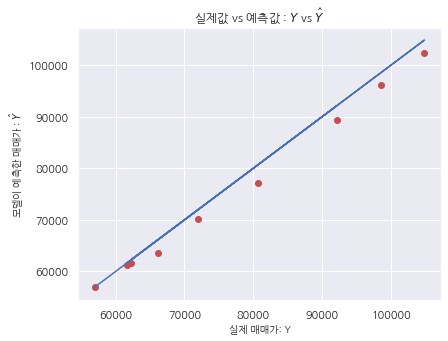

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

# 한글폰트 설정
import matplotlib.font_manager as fm
path = 'C:\\Windows\\Fonts\\NanumGothic.ttf'
font_name = fm.FontProperties(fname=path).get_name()
plt.rc('font', family=font_name)

# 플롯 사이즈 설정
plt.figure(figsize=(6.5, 5))

Y_pred = lr.predict(valid_X_norm)

plt.scatter(valid_y, Y_pred, color='r')
plt.plot(valid_y, valid_y)

plt.xlabel("실제 매매가: Y")
plt.ylabel("모델이 예측한 매매가 : $\hat{Y}$")
plt.title("실제값 vs 예측값 : $Y$ vs $\hat{Y}$")

In [37]:
from sklearn.metrics import mean_absolute_error

train_MAE = mean_absolute_error(train_y, lr.predict(train_X_norm))
valid_MAE = mean_absolute_error(valid_y, lr.predict(valid_X_norm))

print(f"train MAE: {train_MAE:.3f}")
print(f"valid MAE: {valid_MAE:.3f}")

train MAE: 530.917
valid MAE: 1819.616


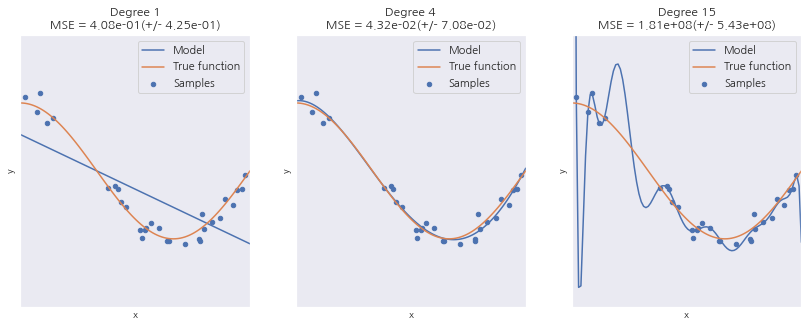

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


def true_fun(X):
    return np.cos(1.5 * np.pi * X)


np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression),
        ]
    )
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(
        pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10
    )

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor="b", s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title(
        "Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
            degrees[i], -scores.mean(), scores.std()
        )
    )
plt.show()

## LR vs. Ridge vs. Lasso

Resgression 모델에는 크게 LASSO와 Ridge가 있습니다.<br>
오차를 계산하는 방식에 따라 L1 Norm 과 L2 Norm 방식을 사용하기 때문입니다.<br>
쉽게 L1 Norm는 예측된 y값과 실제 y값의 차이에 절대값 개념이고, L2 Norm 은 오차에 제곱을 한 값입니다.

## 1) 라쏘 회귀(Lasso Regression)

* 선형 회귀에 규제를 적용한 또 다른 모델로 라쏘 회귀가 있음
* 라쏘 회귀는 릿지 회귀와 비슷하게 가중치를 0에 가깝게 만들지만, 조금 다른 방식을 사용

* 라쏘 회귀에서는 다음과 같은 함수를 최소화 하는 파라미터 $w$를 찾음

\begin{equation}
LassoMSE = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2 + \alpha \sum_{i=1}^{p} |w_i|
\end{equation}

* 라쏘 회귀도 매개변수인 $\alpha$ 값을 통해 규제의 강도 조절 가능

In [39]:
from sklearn.linear_model import Lasso

In [40]:
lasso = Lasso(alpha=1)
lasso.fit(train_X_norm, train_y)

train_rmse = metrics.mean_absolute_error(train_y, lasso.predict(train_X_norm))
valid_rmse = metrics.mean_absolute_error(valid_y, lasso.predict(valid_X_norm))

print(f"train: {train_rmse:.3f}")
print(f"test: {valid_rmse:.3f}")

train: 557.757
test: 1664.763


## 2) 릿지 회귀(Ridge Regression)

* 릿지 회귀는 선형 회귀를 개선한 선형 모델
* 릿지 회귀는 선형 회귀와 비슷하지만, 가중치의 절대값을 최대한 작게 만든다는 것이 다름
* 이러한 방법은 각각의 특성(feature)이 출력 값에 주는 영향을 최소한으로 만들도록 규제(regularization)를 거는 것
* 규제를 사용하면 다중공선성(multicollinearity) 문제를 방지하기 때문에 모델의 과대적합을 막을 수 있게 됨
* 다중공선성 문제는 두 특성이 일치에 가까울 정도로 관련성(상관관계)이 높을 경우 발생
* 릿지 회귀는 다음과 같은 함수를 최소화 하는 파라미터 $w$를 찾음

\begin{equation}
RidgeMSE = \frac{1}{N} \sum_{i=1}^{N}(y_i - \hat{y}_i)^2 + \alpha \sum_{i=1}^{p} w_i^2
\end{equation}

  + $\alpha$: 사용자가 지정하는 매개변수
  * $\alpha$가 크면 규제의 효과가 커지고, $\alpha$가 작으면 규제의 효과가 작아짐

In [41]:
from sklearn.linear_model import Ridge

In [42]:
ridge = Ridge(alpha=1)
ridge.fit(train_X_norm, train_y)

train_MAE = metrics.mean_absolute_error(train_y, ridge.predict(train_X_norm))
valid_MAE = metrics.mean_absolute_error(valid_y, ridge.predict(valid_X_norm))

print(f"train: {train_MAE:.3f}")
print(f"test: {valid_MAE:.3f}")

train: 1411.945
test: 2539.096


## 3) Elastic-Net

* 신축망은 릿지 회귀와 라쏘 회귀, 두 모델의 모든 규제를 사용하는 선형 모델
* 두 모델의 장점을 모두 갖고 있기 때문에 좋은 성능을 보임
* 데이터 특성이 많거나 서로 상관 관계가 높은 특성이 존재 할 때 위의 두 모델보다 좋은 성능을 보여 줌

* 신축망은 다음과 같은 함수를 최소화 하는 파라미터 $w$를 찾음

\begin{equation}
ElasticMSE = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i) + \alpha \rho \sum_{i=1}^{p} |w_i| + \alpha (1 - \rho) \sum_{i=1}^{p} w_i^2
\end{equation}

  + $\alpha$: 규제의 강도를 조절하는 매개변수
  + $\rho$: 라쏘 규제와 릿지 규제 사이의 가중치를 조절하는 매개변수

## 6-2. 랜덤포레스트(Random Forest)

앙상블 학습의 3가지 대표 방법론 : 1. 배깅 2. 부스팅 3. 스태킹   
랜덤 포레스트 모델은 배깅에 속합니다.

![evaluation](./data/ensemble-methods.png)

### ① 배깅(Bagging)이란? 
  - **B**ootstrap **Agg**regat**ing** 의 약자
  - 전체 데이터에서 부스트랩핑(Bootstrapping) 방식으로 샘플링한 데이터를 학습합니다.  
  - 부스트래핑은 전체 데이터에서 샘플링할 때, 데이터의 중복을 허용하는 방식을 말합니다.
  - 예를 들어 공을 주머니에서 꺼낸 후 확인하고, 다시 넣고 뽑기(복원추출)

![evaluation](./data/bagging.png)

![evaluation](./data/bagging_2.png)

### ② 부스팅  
  - 배깅이 병렬로 Parallel 하게 학습한다면, Boosting은 개별모델의 예측결과가 다음 데이터에 가중치로 부여 sequencial하게 영향.  
  - 오답에는 높은 가중치를, 정답에는 낮은 가중치를 부여합니다. 과적합 이슈  
  - Boosting 기법을 활용한 대표적인 알고리즘은 위에서 언급한 XGBoost와 AdaBoost, GradientBoost 등 모델이 있습니다.

![Boosting](./data/boosting.png)

### ③ 스태킹
  - 개별모델의 예측결과를 다시 train data로 사용하여 학습하는 것. 과적합 이슈
  - Stacking 방법의 경우 Base Learner들이 동일한 데이터 원본 데이터를 가지고 그대로 학습을 진행했기 때문에 overfitting 문제가 발생  
  - Bagging과 Boosting에서는 bootstrap(데이터를 random sampling) 과정을 통해 overfitting을 효과적으로 방지한 것과는 대조적
  - 따라서 Stacking 에서는 크로스 벨리데이션(Cross Validation)을 통해 데이터를 섞어주는 과정을 필수로 추가합니다.

![Boosting](./data/stacking.png)

의사결정나무             |랜덤포레스트                 |
:------------------:|:-----------------------:|
![inner](./data/dt.png)|![outer](./data/rf.png)|

### 랜덤포레스트 모델 튜닝을 위한 하이퍼 파라미터

n_estimators             |min_samples_split                |min_samples_leaf|max_features|max_depth|max_leaf_nodes|
:------------------:|:-----------------------:|:-----------------------:|:-----------------------:|:-----------------------:|:-----------------------:|
나무 그루 수             |분할이 가능한 최소 샘플수               |최소 샘플수|최대 변수 갯수|최대깊이|리프노드 최대갯수|
Default = 10. 무작정 트리 갯수를 늘리면 성능 좋아지는 것 대비 시간이 걸릴 수 있음|- 노드를 분할하기 위한 최소한의 샘플 데이터수→ 과적합을 제어하는데 사용 <br>- Default = 2 → 작게 설정할 수록 분할 노드가 많아져 과적합 가능성 증가| 리프노드가 되기 위해 필요한 최소한의 샘플 데이터수<br>- min_samples_split과 함께 과적합 제어 용도<br>- 불균형 데이터의 경우 특정 클래스의 데이터가 극도로 작을 수 있으므로 작게 설정 필요<br>-min_samples_split과 둘 중 하나만 설정|- 최적의 분할을 위해 고려할 최대 feature 개수<br>- Default = 'auto' (결정트리에서는 default가 none이었음)<br>- int형으로 지정 →피처 갯수 / float형으로 지정 →비중<br>- sqrt 또는 auto : 전체 피처 중 √(피처개수) 만큼 선정<br>- log : 전체 피처 중 log2(전체 피처 개수) 만큼 선정|- 트리의 최대 깊이<br>- default = None→ 완벽하게 클래스 값이 결정될 때 까지 분할 또는 데이터 개수가 min_samples_split보다 작아질 때까지 분할<br>- 깊이가 깊어지면 과적합될 수 있으므로 적절히 제어 필요<br> -나무의 높이|	리프노드의 최대 개수<br> - 나무의 너비|

In [43]:
# 필수 라이브러리
import pandas as pd
import numpy as np
import random

# 데이터 전처리
from sklearn import datasets
train = df[df.index < pd.to_datetime('2019-12-31')]
test = df[df.index > pd.to_datetime('2019-12-31')]

# 2. 변수선택(독립변수, 목적변수)
features = ['강남구_매매지수', '강남구_전세지수', '서울_인허가물량', '서울_분양물량', 'DFF', 'NASDAQCOM',
       'CSUSHPISA', 'CORESTICKM159SFRBATL', 'HSN1F', 'USSTHPI', 'GDP', 'WM2NS',
       'ICSA']
target = 'gangnam_price(만원)'
            
X = train[features]
y = train[target]

# 램덤 시드 고정
SEED = 1
random.seed(SEED)
np.random.seed(SEED)

# 데이터 전처리
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
                                                      
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.2, random_state=1)

# 피처 스케일링 (트리계열 모델은 스케일링에 큰 영향을 받지는 않습니다.)
scaler = preprocessing.MinMaxScaler()

train_X_norm = scaler.fit_transform(train_X)
valid_X_norm = scaler.fit_transform(valid_X)

# 회귀모델 학습

RF = RandomForestRegressor()    
RF.fit(train_X_norm, train_y)

# 예측값 생성
predicts = RF.predict(valid_X_norm)

# 오차계산
from sklearn.metrics import mean_absolute_error

valid_MAE = mean_absolute_error(valid_y, predicts)
print(f"valid MAE: {valid_MAE:.3f}")

test_X_norm = scaler.transform(test[features])
final_predict = RF.predict(test_X_norm)

valid MAE: 2851.834


## (별도) 6-3. 딥러닝(Deep Learning)
구글에서 개발한 딥러닝 플랫폼 tensorflow를 사용하겠습니다.<br>
먼저 텐서플로우 설치가 필요합니다.

### 딥러닝 모델 설계

* 과적합 방지 : Dropout<br>
train data set 에 지나치게 과적합(overfit) 되는 것을 방지하기 위해서 Dropout을 활용합니다.<br>
과적합 방지 방법은 Batch Normalization, Dropout 등이 있습니다. 개별적으로 더 공부해 보시기 바랍니다.

* 참고서적 : 딥러닝을 위한 자연어처리 입문(웹북)
https://wikidocs.net/61374

* 딥러닝 모델 학습 시 몇 개의 노드를 제외하고 학습하는 방법
* 랜덤하게 사용하지 않을 노드를 결정
* 계산이 줄어드는 만큼 variance가 줄어들어 overfitting을 줄일 수 있음.

## 7. Grid Search
Best Parameter와 모델을 찾는 코드입니다.

[sklearn.model_selection.GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

![evaluation](./data/gridsearch.png)

![evaluation](./data/gridsearch2.png)

In [44]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 150, 200, 250],
    'max_depth': [None, 6, 9, 12],
    'min_samples_split': [0.01, 0.05, 0.1],
    'max_features': ['auto', 'sqrt'],
}

RF = RandomForestRegressor()

from sklearn.model_selection import KFold

kf = KFold(random_state=30,
           n_splits=10,
           shuffle=True,
          )

# define grid_search
grid_search = GridSearchCV(estimator=RF, 
                           param_grid=param_grid, 
                           cv=kf, 
                           n_jobs=-1, 
                           verbose=2
                          )

# fit with (x_train, y_train)
grid_search.fit(train_X_norm, train_y)

grid_search.best_params_

Fitting 10 folds for each of 96 candidates, totalling 960 fits


{'max_depth': 12,
 'max_features': 'sqrt',
 'min_samples_split': 0.01,
 'n_estimators': 100}

## 8. Cross Validation
  - train set을 train set + validation set으로 분리한 뒤, validation set을 사용해 생성한 모델을 검증  
  - k-fold 교차검증을 사용하는데 k는 상수값으로 통상 5~10으로 설정합니다.  
  - k=5 라면, 훈련데이터를 5개로 나누고, 한번에 80%를 훈련에 20%를 검증에 사용합니다.  
  - k=10 이라면, 훈련데이터를 10개로 나누고 한번에 90%를 훈련에, 10%를 검증에 사용합니다.   
  - 많은 데이터는 보통 정확한 모델을 만들어 내지만 모델 k개를 만들어야하므로 대략 k배 느리게 됩니다.

[Cross-validation: evaluating estimator performance](https://scikit-learn.org/stable/modules/cross_validation.html)

* 장점 : 
1. 모든 데이터 셋을 훈련에 활용할 수 있다.> 데이터가 부족할 경우 활용으로 정확도 향상(Underfitting 해결)
2. 모든 데이터 셋을 평가에 활용할 수 있다.> 평가에 사용되는 데이터 편중을 막아 일반화된 모델 생성(Overfitting 과적합 방지)
* 단점 : iteration 반복횟수가 많아져 모델의 훈련과 평가에 시간이 오래 걸린다.

![evaluation](./data/cv.png)

In [45]:
#위에서 찾은 best parameter 을 갖는 모델을 아래와 같이 생성해줄 수 있습니다.

In [46]:
best_model = grid_search.best_estimator_

In [ ]:
# 필수 라이브러리
import pandas as pd
import numpy as np
import random

# 데이터 전처리
from sklearn import datasets
train = df[df.index < pd.to_datetime('2019-12-31')]
test = df[df.index > pd.to_datetime('2019-12-31')]


# 2. 변수선택(독립변수, 목적변수)
features = ['강남구_매매지수', '강남구_전세지수', '서울_인허가물량', '서울_분양물량', 'DFF', 'NASDAQCOM',
       'CSUSHPISA', 'CORESTICKM159SFRBATL', 'HSN1F', 'USSTHPI', 'GDP', 'WM2NS',
       'ICSA']
target = 'gangnam_price(만원)'
            
            
X = train[features]
y = train[target]

# 램덤 시드 고정
SEED = 1
random.seed(SEED)
np.random.seed(SEED)


# 데이터 분할
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
                                                      
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.2, random_state=1)

# 피처 스케일링
scaler = preprocessing.MinMaxScaler()

train_X_norm = scaler.fit_transform(train_X)
valid_X_norm = scaler.fit_transform(valid_X)
test_X_norm = scaler.transform(test[features])


# GridSearch
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 150, 200, 250, 300, 350, 400],
    'max_depth': [None, 6, 12, 24, 32, 64],
    'min_samples_split': [0.01, 0.05, 0.1],
    'max_features': ['auto', 'sqrt'],
}

RF = RandomForestRegressor()

# Cross Validation
from sklearn.model_selection import KFold
kf = KFold(random_state=30,
           n_splits=10,
           shuffle=True,
          )


# define grid_search
grid_search = GridSearchCV(estimator=RF, 
                           param_grid=param_grid, 
                           cv=kf, 
                           n_jobs=-1, 
                           verbose=2
                          )

grid_search.fit(train_X_norm, train_y)
grid_search.best_params_

# 베스트 모델 학습
best_model.fit(train_X_norm, train_y)

# 예측값 생성
predicts = best_model.predict(valid_X_norm)

# 오차계산
from sklearn.metrics import mean_absolute_error

valid_MAE = mean_absolute_error(valid_y, predicts)
print(f"valid MAE: {valid_MAE:.3f}")

# test_X_norm = scaler.transform(test[features])
final_predict = best_model.predict(test_X_norm)


Fitting 10 folds for each of 252 candidates, totalling 2520 fits


In [ ]:
print(grid_search.best_params_)

In [ ]:
import time
import numpy as np

start_time = time.time()
importances = best_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in best_model.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

In [ ]:
import pandas as pd

forest_importances = pd.Series(importances, index=features)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax) #yerr=std 

ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

## 변수 중요도(Variable Importnace)

[Feature importances with a forest of trees](https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html)

랜덤 포레스트는 블랙박스모형이기 때문에 종속변수와 독립변수의 설명력을 확보하기 어렵다는 단점.   
따라서 변수 중요도(Variable Importance)를 통해 어떤 변수가 예측 성능에 중요한 역할을 하는지를 판단

MDI Importance는 scikit-learn의 default로 내장되어 있는 가장 대표적인 변수 중요도
각 변수가 split될 때 impurity 감소분의 평균을 중요도로 정의

![evaluation](./data/mdi.png)

* i(t) : t노드의 impurity (entropy, gini index, variance, ...)  
* N(t) : t노드의 관측치 개수  
각 노드의 관측치 개수를 고려하여 impurity 감소분이 계산되며, 값이 클수록 중요도가 높습니다.

* 장점 : 빠르고, 직관적임  
* 단점 : 연속형 변수와 high-cardinality 범주형 변수에 대해서는 편향됨.

# grid search 참고자료
https://statkclee.github.io/model/model-python-xgboost-hyper.html

## R square 값이란?

피어슨 상관 계수가 -1 ~ 1 사이의 값을 가지므로 R square 값은 0~1 사이의 값을 가지게 됩니다.  
독립변수가 종속변수를 얼마나 많이 설명할 수 있는가?에 대한 설명력을 의미합니다.